In [20]:
# Common packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style, pairplot

set_style("whitegrid")

## Import Data

In [21]:
data_Cancer = pd.read_csv('cancer_data_cleaned.csv')

In [22]:
data_Cardiovascular = pd.read_csv('cardiovascular_data_cleaned.csv')

In [23]:
data_Respiratory = pd.read_csv('respiratory_data_cleaned.csv')

In [24]:
data = pd.concat([data_Cancer, data_Cardiovascular, data_Respiratory])
data.keys()

Index(['Rank', 'Title', 'Status', 'Study Results', 'Conditions',
       'Interventions', 'Outcome Measures', 'Gender', 'Age', 'Phases',
       'Enrollment', 'Start Date', 'Completion Date', 'Locations', 'URL',
       'Actual', 'Estimated', 'Countries', 'EFraction', 'Intervention',
       'Disease', 'Month'],
      dtype='object')

In [25]:
data['Age_Type'] = data['Age'].apply(lambda st: st[st.find("(")+1:st.find(")")]).copy()
data['Disease'].unique()

array(['Cancer', 'Cardiovascular', 'Respiratory'], dtype=object)

## Dictionaries to change categorical variables to numerical

In [26]:
# Dictionaries to change strings to associated numbers
status_dict = {"Terminated" : 0 , "Completed" : 1}
intervention_dict = {'Behavioral': 0, 'Biological': 1, 'Combination Product': 2, 'Device': 3, 'Diagnostic Test': 4, 'Dietary Supplement': 5, 'Drug': 6, 'Genetic': 7, 'Other': 8, 'Procedure': 9, 'Radiation': 10}
phases_dict = {'Early Phase 1': 0, 'Not Applicable': 1, 'Phase 1': 2, 'Phase 1|Phase 2': 3, 'Phase 2': 4, 'Phase 2|Phase 3': 5, 'Phase 3': 6, 'Phase 4': 7}
age_dict = {'Child': 0, 'Adult': 1, 'Older Adult': 2, 'Child, Adult': 3, 'Child, Adult, Older Adult': 4, 'Child, Adult, Older Adul': 4, 'Adult, Older Adult': 5}
disease_dict = {'Cancer': 0, 'Cardiovascular': 1, 'Respiratory': 2}

In [27]:
# Add numerical value columns for categorical data 
data['Intervention_Num'] = data['Intervention']
data = data.replace({'Intervention_Num': intervention_dict}).copy()

data['Phase_Num'] = data['Phases']
data = data.replace({'Phase_Num': phases_dict}).copy()

data['Age_Num'] = data['Age_Type']
data = data.replace({'Age_Num': age_dict}).copy()

data['Disease_Num'] = data['Disease']
data = data.replace({'Disease_Num': disease_dict}).copy()

In [28]:
# remove outliers in EFraction
data = data[data['EFraction'].notna()]
def check_if_float(row):
    if row['EFraction'] <= 2:
        return True
    else:
        return False
        

map = data.apply(check_if_float, axis=1)

data = data[map]

In [29]:
data

,Rank,Title,Status,Study Results,Conditions,Interventions,Outcome Measures,Gender,Age,Phases,...,Countries,EFraction,Intervention,Disease,Month,Age_Type,Intervention_Num,Phase_Num,Age_Num,Disease_Num
0,1,Rehabilitation After Breast Cancer,1,No Results Available,Breast Cancer,Behavioral: Individually tailored nurse naviga...,Distress|Depression|Anxiety|Health related qua...,Female,"18 Years and older (Adult, Older Adult)",Not Applicable,...,['Denmark'],0.953704,Behavioral,Cancer,43,"Adult, Older Adult",0,1.0,5,0
1,2,Testing Feasibility of Motivational Interviewi...,1,No Results Available,Other Cancer,Behavioral: Motivational Interviewing,Feasibility of Motivational Interviewing inter...,All,"18 Years and older (Adult, Older Adult)",Not Applicable,...,['United States'],1.000000,Behavioral,Cancer,9,"Adult, Older Adult",0,1.0,5,0
2,3,Individualizing Surveillance Mammography for O...,1,No Results Available,Breast Cancer,Other: Communication Tool,Rate of change in intentions for mammography i...,Female,75 Years and older (Older Adult),Not Applicable,...,['United States'],1.000000,Other,Cancer,26,Older Adult,8,1.0,2,0
3,4,Oxcarbazepine Plus Morphine in Patients With R...,0,No Results Available,Cancer,Drug: Morphine|Drug: Oxcarbazepine,Number of patients with adverse events as a me...,All,"18 Years and older (Adult, Older Adult)",Phase 1,...,['United States'],0.083333,Drug,Cancer,9,"Adult, Older Adult",6,2.0,5,0
4,5,Immediate-Release Oxycodone Capsules Study in ...,1,Has Results,Cancer,Drug: Oxycodone|Drug: Morphine,Numerical Rating Scale (NRS)|The Average Dose ...,All,"18 Years to 80 Years (Adult, Older Adult)",Phase 3,...,NaN,1.008333,Drug,Cancer,18,"Adult, Older Adult",6,6.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,Convalescent Plasma of Covid-19 to Treat SARS-...,1,No Results Available,SARS Pneumonia,Biological: Convalescent Plasma of patients wi...,Death|Lenth of stay ICU|Days of Mechanical Ven...,All,"18 Years to 70 Years (Adult, Older Adult)",Phase 2,...,['Mexico'],0.525000,Biological,Respiratory,7,"Adult, Older Adult",1,4.0,5,2
9996,9997,Effects of Green Tea Extract (GTE) on Systemic...,1,No Results Available,Asthma,Dietary Supplement: green tea extract,Serum Inflammatory markers|Respiratory symptoms,All,"18 Years to 70 Years (Adult, Older Adult)",Not Applicable,...,['Hong Kong'],1.000000,Dietary Supplement,Respiratory,30,"Adult, Older Adult",5,1.0,5,2
9997,9998,Same-session MR-only Simulation and Treatment ...,1,No Results Available,Malignancy|Metastasis|Hemoptysis|Gastrointesti...,Device: Volumetric MR imaging|Radiation: Radia...,Feasibility of same-session MRI-only simulatio...,All,"18 Years and older (Adult, Older Adult)",Not Applicable,...,['United States'],1.000000,Device,Respiratory,33,"Adult, Older Adult",3,1.0,5,2
9998,9999,Dietary Interventions in Asthma Treatment: Spr...,0,Has Results,Asthma|Allergy,Other: Broccoli Sprouts|Other: Alfalfa Sprouts,Change in Forced Expiratory Volume at One Seco...,All,18 Years to 49 Years (Adult),Not Applicable,...,['United States'],0.026316,Other,Respiratory,15,Adult,8,1.0,1,2


In [30]:
# Save final data set
data.to_csv('final_data.csv',index=False)

## Desciptive Statistics

##### 4. Look at the data

Here are descriptions of each of the columns for this data set:
- `Status`:
    - `Completed`: "The study has ended normally, and participants are no longer being examined or treated"
    - `Terminated`: "The study has stopped early and will not start again. Participants are no longer being examined or treated."
- `Study Results`:
- `Conditions`:
- `Interventions`:
- `Outcome Measures`:
- `Gender`:
- `Age`:
- `Phases`:
    - `Phase 1`: Test on healthy individuals to see if drug side effects (safety)
    - `Phase 2`: Test on sick individulas to see if effective (efficacy)
    - `Phase 3`: Test on wide range of individuals (different populations) to see if similar response across population (safety and efficacy data)
    - `Phase 4`: Post market FDA approval trials more info about safety (safety)
    - `Not Applicable`: Describes trials without FDA-defined phases, including trials of devices or behavioral interventions.
- `Enrollment`:
- `Locations`:
- `EFraction`: (Enrollment Fraction) / (Amount Desired)

In [9]:
# Calculate Percentages of Data based on Disease Type
Status = np.round(data.groupby('Disease')['Status'].value_counts().to_frame()/(data['Status'].count())*100,2)
Intervention = np.round(data.groupby('Disease')['Intervention'].value_counts().to_frame()/(data['Intervention'].count())*100, 2)
Phases = np.round(data.groupby('Disease')['Phases'].value_counts().to_frame()/(data['Phases'].count())*100, 2)
EFraction = np.round(data.groupby('Disease')['EFraction'].value_counts().to_frame()/(data['EFraction'].count())*100, 2)
Gender = np.round(data.groupby('Disease')['Gender'].value_counts().to_frame()/(data['Gender'].count())*100, 2)
Month = np.round(data.groupby('Disease')['Month'].value_counts().to_frame()/(data['Month'].count())*100, 2)

In [10]:
# Print DataFrames
Status, Intervention, Phases, EFraction, Gender, Month

(                       Status
 Disease        Status        
 Cancer         1        27.19
                0         6.14
 Cardiovascular 1        29.67
                0         3.66
 Respiratory    1        29.78
                0         3.56,
                                     Intervention
 Disease        Intervention                     
 Cancer         Drug                        20.98
                Biological                   3.02
                Behavioral                   2.27
                Other                        1.99
                Procedure                    1.95
                Radiation                    1.16
                Device                       1.01
                Dietary Supplement           0.60
                Diagnostic Test              0.18
                Genetic                      0.11
                Combination Product          0.05
 Cardiovascular Drug                        14.47
                Device                       6.05
 

In [11]:
# Comparison across columns of dataframe
# condition (if)
Disease_Status_EFraction = np.round(data.groupby(['Disease', 'Status'])['EFraction'].value_counts().to_frame(), 2)
Disease_Status_Intervention = np.round(data.groupby(['Disease', 'Status'])['Intervention'].value_counts().to_frame(), 2),
Disease_Status_Phases = np.round(data.groupby(['Disease', 'Status'])['Phases'].value_counts().to_frame(), 2)
Disease_Status_Month = np.round(data.groupby(['Disease', 'Status'])['Month'].value_counts(bins=10).to_frame(), 2)
Disease_Status_Age = np.round(data.groupby(['Disease', 'Status'])['Age_Num'].value_counts().to_frame(), 2)

In [13]:
# Print DataFrames
Disease_Status_EFraction, Disease_Status_Intervention, Disease_Status_Phases, Disease_Status_Month, Disease_Status_Age

(                               EFraction
 Disease     Status EFraction            
 Cancer      0      1.000000          175
                    0.200000           39
                    0.100000           28
                    0.500000           26
                    0.166667           24
 ...                                  ...
 Respiratory 1      15.125000           1
                    16.173913           1
                    19.652000           1
                    41.294393           1
                    118.370805          1
 
 [8568 rows x 1 columns],
 (                                        Intervention
  Disease     Status Intervention                     
  Cancer      0      Drug                         1301
                     Biological                    164
                     Procedure                     102
                     Other                          77
                     Radiation                      66
  ...                                    

### EFraction Analysis

In [15]:
#eda_df = pd.DataFrame([data['Status'], data['EFraction']])

In [14]:
#Statistical 
data['Comp_EF_0.5'] = (data['Status'] == 1) & (data['EFraction'] <= 0.5)
data['Term_EF_0.5'] = (data['Status'] == 0) & (data['EFraction'] <= 0.5)

Terminated_EF_Percent = np.round(data['Term_EF_0.5'].value_counts()[True]/(data['Term_EF_0.5'].value_counts()[True]+data['Comp_EF_0.5'].value_counts()[True])*100)
Terminated_EF_Percent

52.0

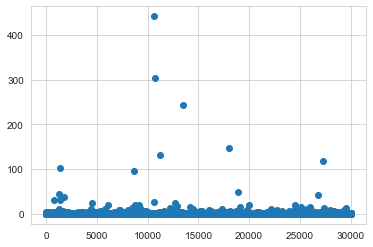

In [15]:
# EDA with numerical variables
plt.scatter(range(len(data)), data['EFraction'])
#plt.ylim([0,10])
plt.show()

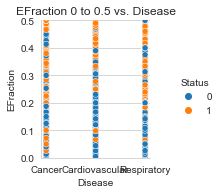

In [16]:
pairplot(data=data, 
             hue='Status',
             y_vars = ['EFraction'],
             x_vars = ['Disease'])
plt.ylim([0,0.5])
plt.title('EFraction 0 to 0.5 vs. Disease')
plt.show()

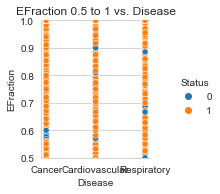

In [17]:
pairplot(data=data, 
             hue='Status',
             y_vars = ['EFraction'],
             x_vars = ['Disease'])
plt.ylim([0.5,1])
plt.title('EFraction 0.5 to 1 vs. Disease')
plt.show()

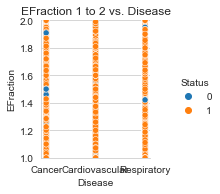

In [20]:
pairplot(data=data, 
             hue='Status',
             y_vars = ['EFraction'],
             x_vars = ['Disease'])
plt.ylim([1,2])
plt.title('EFraction 1 to 2 vs. Disease')
plt.show()

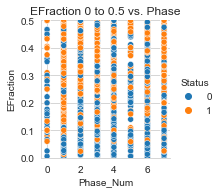

In [21]:
pairplot(data=data, 
             hue='Status',
             y_vars = ['EFraction'],
             x_vars = ['Phase_Num'])
plt.ylim([0,0.5])
plt.title('EFraction 0 to 0.5 vs. Phase')
plt.show()

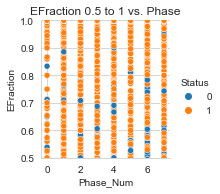

In [22]:
pairplot(data=data, 
             hue='Status',
             y_vars = ['EFraction'],
             x_vars = ['Phase_Num'])
plt.ylim([0.5,1])
plt.title('EFraction 0.5 to 1 vs. Phase')
plt.show()

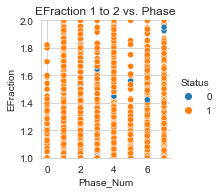

In [23]:
pairplot(data=data, 
             hue='Status',
             y_vars = ['EFraction'],
             x_vars = ['Phase_Num'])
plt.ylim([1, 2])
plt.title('EFraction 1 to 2 vs. Phase')
plt.show()

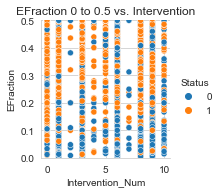

In [24]:
pairplot(data=data, 
             hue='Status',
             y_vars = ['EFraction'],
             x_vars = ['Intervention_Num'])
plt.ylim([0,0.5])
plt.title('EFraction 0 to 0.5 vs. Intervention')
plt.show()

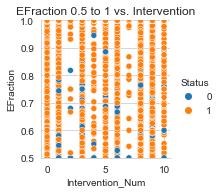

In [25]:
pairplot(data=data, 
             hue='Status',
             y_vars = ['EFraction'],
             x_vars = ['Intervention_Num'])
plt.ylim([0.5,1])
plt.title('EFraction 0.5 to 1 vs. Intervention')
plt.show()

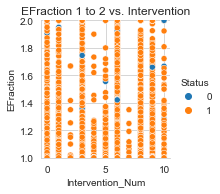

In [26]:
pairplot(data=data, 
             hue='Status',
             y_vars = ['EFraction'],
             x_vars = ['Intervention_Num'])
plt.ylim([1,2])
plt.title('EFraction 1 to 2 vs. Intervention')
plt.show()

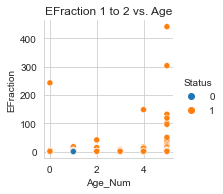

In [34]:
pairplot(data=data, 
             hue='Status',
             y_vars = ['EFraction'],
             x_vars = ['Age_Num'])
plt.title('EFraction 1 to 2 vs. Age')
plt.ylim
plt.show()

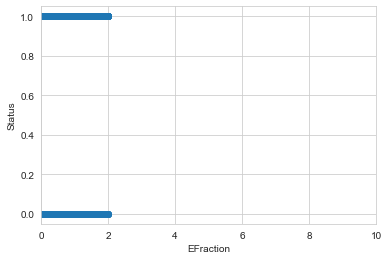

In [31]:
plt.scatter(data['EFraction'], data['Status'])
plt.xlim([0,10])
plt.xlabel('EFraction')
plt.ylabel('Status')
plt.show()

## Model Proposed
- Logistic Regression onto Status of Trial based on select Features:
        - `EFraction`
        -  And select subfeatures to determine Status
                - `Age`
                - `Month`
                - `Phase`
                - `Country`
                - `Disease`
                - `Intervention`